# Artificial Neural Network (ANN)
- Deep Learning is the most excisting and powerful branch of Machine Learning. It can be used for a variety of complex tasks:
        - Artificial Neural Networks for Regression and Classification
        - Convolutional Neural Networks for Computer Vision
        - Recurrent Neural Networks for Time Series Analysis
        - Self Organizing Maps for Feature Extraction
        - Deep Boltzmann Machine for Recommendation System
        - Auto Encoders for Recommendation System

**The Neuron**
- Image in the Human Brain
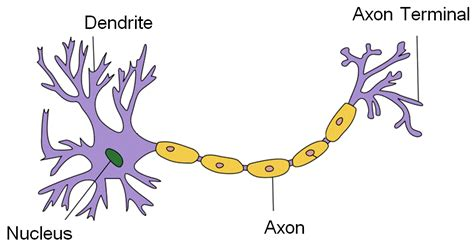
- Image in the Machine
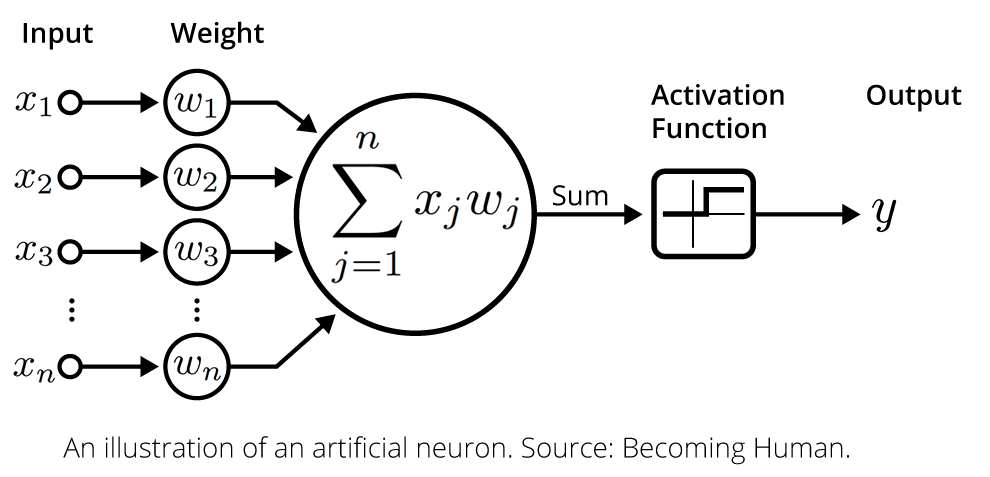

**The Activation Function**
     
`1. Threshold Function`
    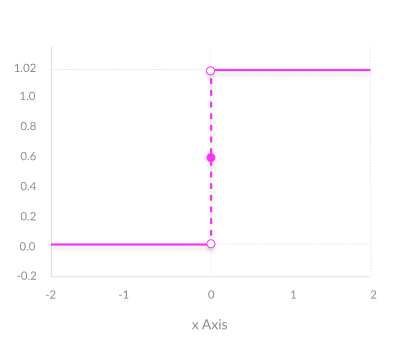
   - It is a simple type of function where, if the value is less than 0 then the Threshold Function passes on 0, and if the value if more than 0 then threshold function passes on 1.

`2. Sigmod`
    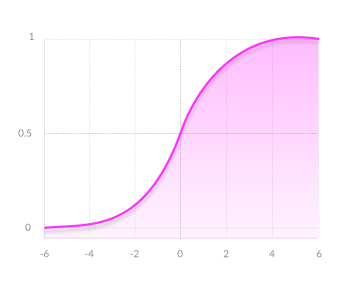
   - Smooth gradient, preventing “jumps” in output values.
   - Output values bound between 0 and 1, normalizing the output of each neuron.
   - Clear predictions—For X above 2 or below -2, tends to bring the Y value (the prediction) to the edge of the 
      curve, very close to 1 or 0. This enables clear predictions.
     
`3. Rectifier`
    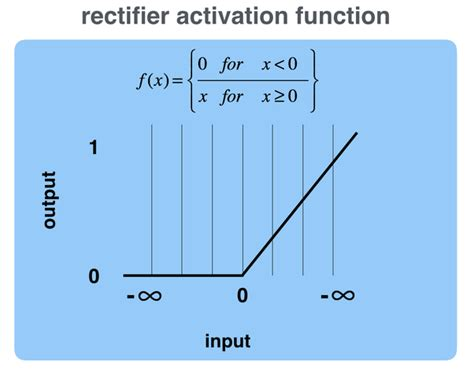
   - One of the most used function in ANN.
   
`4. Hyperbolic Tangent`
    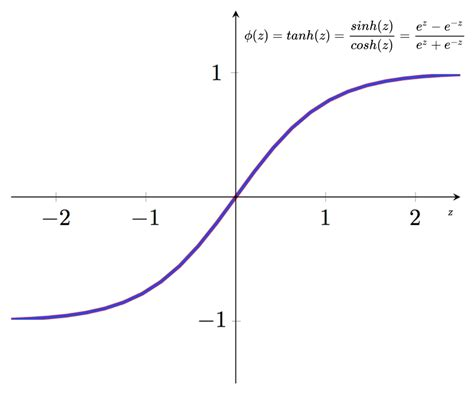
   - Value goes from -1 to 1.

**How do Neural Network Work?**
    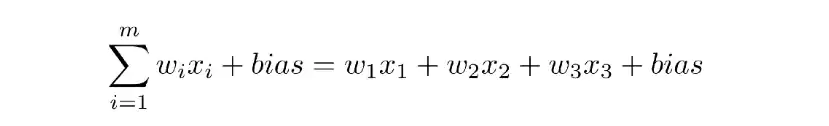
    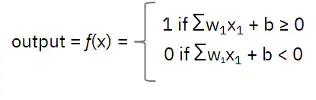
    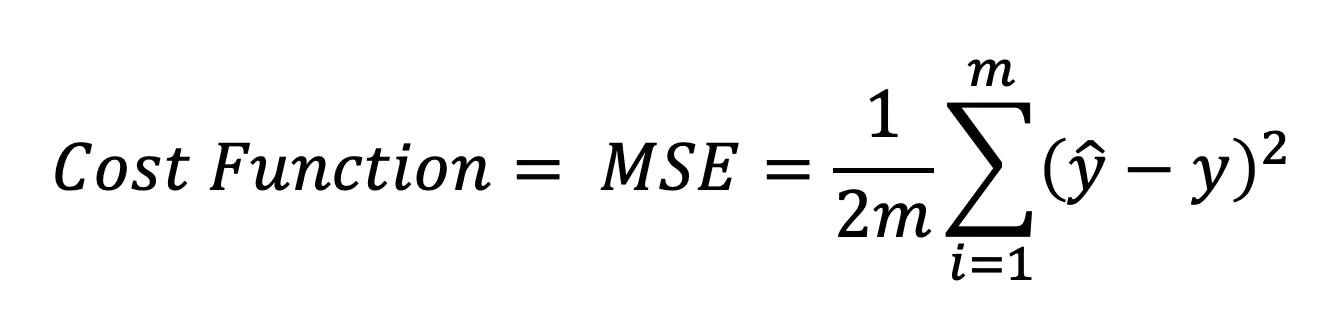
   - i represents the index of the sample, y-hat is the predicted outcome, y is the actual value, and m is the number of samples.


**How do Neural Network Learn?**
    
- If we observe nature, we can see that systems that are able to learn are highly adaptable. In their quest to acquire knowledge, these systems use input from the outside world and modify information that they’ve already collected, or modify their internal structure. That is exactly what ANNs do. They adapt and modify their architecture in order to learn. To be more precise, the ANNs change weights of connections based on input and desired output.
- “Why weights?”, one might ask. Well, if you look closer into the structure of the ANNs, there are a few components we could change inside of the ANN if we want to modify their architecture. For example, we could create new connections among neurons, or delete them, or add and delete neurons. We could even modify input function or activation function. As it turns out, changing weights is the most practical approach. Plus, most of the other cases could be covered by changing weights. Deleting a connection, for example, can be done by setting the weight to 0. And a neuron can be deleted if we set weights on all its connections to zero.

**Gradient Descent**

- The entire point of training is to set the correct values to the weights, so we get the desired output in our neural network. This means that we are trying to make the value of our error vector as small as possible, i.e. to find a global minimum of the cost function. One way of solving this problem is to use calculus. We could compute derivatives and then use them to find places where is an extremum of the cost function. However, the cost function is not a function of one or a few variables; it is a function of all weights in the network, so these calculations will quickly grow into a monster. That is why we use the technique called gradient descent.
- Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function.
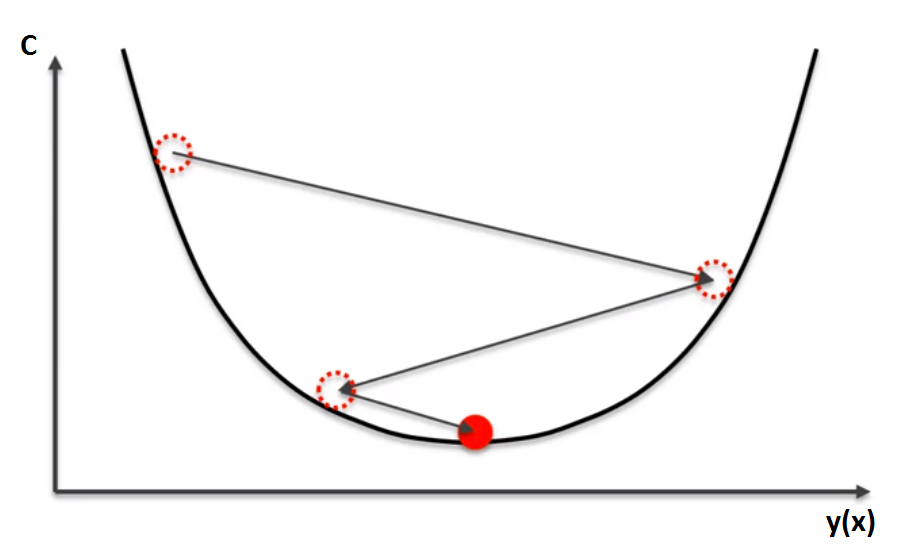


**Training the ANN with Stochastic Gradiant Descent**
- Steps;
        - Step 1 : Randomly initialise the weights to small numbers close to 0 (not 0).
        - Step 2 : Input the first observation of your dataset in the input layer, each feature in one input node.
        - Step 3 : Forward-Propagation: from left to right, the neurons are activated in a way that the impact of each 
                   neurons activation is limited by the weights. Propagate the activations until getting the predicted 
                   result y.
        - Step 4 : Compare the predicted result to the actual result. Measure the generated error.
        - Step 5 : Back-Propagation: from right to left, the error is back propagated. Update the weights according to how 
                   much they are responsible for the error. The learning rate decides by how much we update the weights.
        - Step 6 : Repeat step 1 to 5 and update the after each observation (Reinforcement Learning) or Repeat step 1 to 5 
                   but update the weigths only after a batch of observation (Batch Learning).
        - Step 7 : When the whole training set passed through the ANN , that makes an epoch, Redo mode epochs.

**Importing the Libraries**

In [1]:
# Numpy allows us to work with array.
import numpy as np

# Pandas allows us to not only import the datasets but also create the matrix of features(independent) and 
# dependent variable.
import pandas as pd

# TensorFlow has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers 
# push the state-of-the-art in ML and developers easily build and deploy ML powered applications.
import tensorflow as tf

### PART - 1 : Data Preprocessing

**Importing the Dataset**

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [3]:
print(y)

[1 0 1 ... 1 1 0]


**Encoding Categorical Data**
- Label encoding the "Gender" column

In [4]:
# Importing Package
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x[:, 2] = le.fit_transform(x[:, 2])

print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


**One Hot Encoding the "Geoghraphy" column**

In [5]:
# Importing Package
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

print(x)
# France = 1 0 0
# Spain = 0 0 1
# Germany = 0 1 0

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Splitting the dataset into the Training and Test Set**

In [6]:
# Importing Packaage
from sklearn.model_selection import train_test_split

# Dividing training and test set.
# The best ratio is 80 - 20 for trainging and testing respectively.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

print(x_train)

[[0.0 1.0 0.0 ... 0 1 124749.08]
 [1.0 0.0 0.0 ... 0 0 41104.82]
 [0.0 1.0 0.0 ... 1 1 45750.21]
 ...
 [1.0 0.0 0.0 ... 1 1 92027.69]
 [1.0 0.0 0.0 ... 1 1 101168.9]
 [0.0 1.0 0.0 ... 1 0 33462.94]]


**Feature Scaling**

In [7]:
# Importing Package
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

print(x_train)

[[-0.99850112  1.71490137 -0.57273139 ... -1.55337352  0.97725852
   0.42739449]
 [ 1.00150113 -0.58312392 -0.57273139 ... -1.55337352 -1.02327069
  -1.02548708]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017  0.97725852
  -0.94479772]
 ...
 [ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017  0.97725852
  -0.14096853]
 [ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017  0.97725852
   0.01781218]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017 -1.02327069
  -1.15822478]]


In [8]:
print(x_test)

[[ 0.98019606 -0.56118125 -0.57812007 ...  0.65543311  0.9426421
  -0.04925965]
 [ 0.98019606 -0.56118125 -0.57812007 ...  0.65543311 -1.06084802
  -0.58254072]
 [ 0.98019606 -0.56118125 -0.57812007 ... -1.52570869  0.9426421
  -0.16313933]
 ...
 [-1.02020406 -0.56118125  1.72974448 ... -1.52570869  0.9426421
   1.07759708]
 [-1.02020406  1.78195548 -0.57812007 ...  0.65543311  0.9426421
   1.14197101]
 [-1.02020406  1.78195548 -0.57812007 ...  0.65543311  0.9426421
  -0.88821212]]


### PART - 2 :  Building the ANN

**Initailizing the ANN**

In [9]:
# An instance of the sequential class which intializes as a sequence of layers.
ann = tf.keras.models.Sequential()

**Adding the input layer and the First hidden layer**

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Adding the Second hidden layer**

In [11]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Adding the Output layer**

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### PART - 3 : Training the ANN

**Compiling the ANN**

In [13]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the ANN on the Training Set**

In [14]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5797 - accuracy: 0.7229
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8005
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8115
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8224
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.8240
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4093 - accuracy: 0.8280
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8289
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8307
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8311
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3904 - accura

Epoch 81/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8654
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8637
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8645
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8634
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8641
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8649
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8641
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8654
Epoch 89/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3275 - accuracy: 0.8664
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3279

### PART - 4 : Making the Prediction and Evaluating the Model

**Predicting the result of a single observation**

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [15]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


In [16]:
# Predicting
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


**Making the Confusion Matrix**

In [17]:
# Importing Package
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicting
y1_pred = classifier.predict(x1_test)

# Confusion Matrix
cm1 = confusion_matrix(y1_test, y1_pred)
print(cm1)

# Accuracy Score
accuracy_score(y1_test, y1_pred)

[[1515   70]
 [ 190  225]]


0.87